<a href="https://colab.research.google.com/github/dwduartejr/hello-world/blob/master/Food_Hub_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# read the data
# Update the file path to point to the location of the file in your Google Drive
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [77]:
# Question 1: How many rows and columns are present in the data? [0.5 mark]

# Get number of rows and columns
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 1898, Columns: 9


Observations About the Food Delivery Service Data
Dataset Overview:

The dataset contains 1,898 rows and 9 columns, covering various aspects of food delivery orders.

Key Attributes in the Data:

Order Information: Each order has a unique order_id and customer_id.

Restaurant & Cuisine Data: The dataset includes restaurant_name and cuisine_type, which can help analyze restaurant popularity and preferred cuisines.

Financial Aspect: The cost_of_the_order column captures spending per order.

Timing Factors: food_preparation_time and delivery_time provide insights into operational efficiency.

Customer Sentiment: The rating column reflects customer satisfaction.

Day-wise Trends: day_of_the_week enables analysis of order frequency based on weekdays vs. weekends.

Potential Areas for Analysis:

Order Trends: Assess order volume by day of the week.

Cuisine Preference: Identify popular cuisine types.

Restaurant Performance: Compare ratings, preparation times, and delivery efficiency.

Delivery Speed Optimization: Examine correlations between preparation time, delivery time, and ratings.

Customer Spending Patterns: Investigate average order cost across different restaurants and cuisines.

In [78]:
# Question 2: What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations Based on the Provided Data
Dataset Structure:

The dataset contains 1,898 entries, indexed from 0 to 1,897.

There are 9 columns, covering aspects of restaurant orders, customer ratings, timing, and cuisine preferences.

Data Type Distribution:

4 columns contain numerical data (int64): order_id, customer_id, food_preparation_time, and delivery_time.

4 columns contain categorical/text data (object): restaurant_name, cuisine_type, day_of_the_week, and rating.

1 column (cost_of_the_order) contains floating-point data (float64), indicating order cost.

Potential Insights for Analysis:

Order Trends: Analyzing day_of_the_week can reveal peak order times.

Customer Spending Patterns: cost_of_the_order can help assess pricing trends and profitability.

Restaurant Performance: Examining food_preparation_time and delivery_time can highlight efficient or slow-performing restaurants.

Cuisine Preference: The cuisine_type column can provide insights into customer preferences.

Customer Satisfaction: The rating column can help identify well-rated restaurants versus underperforming ones.

In [79]:
# Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

# Identify missing values
print(df.isnull().sum())  # Shows the count of missing values per column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


Observations on Data Quality

Completeness

Since there are no missing values, the dataset is fully intact, which simplifies analysis and prevents data imputation complexities.

Consistency

The data types appear well-structured (int64, float64, object), ensuring proper operations such as sorting, filtering, and calculations.

Potential Issues to Check

Data Accuracy: Confirm that values are correctly recorded (e.g., ratings are valid, cost_of_the_order aligns with realistic values).

Categorical Data Quality: Validate if categories like cuisine_type or day_of_the_week are consistently labeled.

Numerical Outliers: Check food_preparation_time and delivery_time for extreme values that might indicate anomalies.

Opportunities for Enhancement

Standardize rating entries (e.g., handling "Not given" ratings).

Verify duplicates in order_id or customer_id that could indicate data entry errors.

In [80]:
# Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum
# time it takes for food to be prepared once an order is placed? [2 marks]

# Calculate summary statistics

min_time = df['food_preparation_time'].min()
avg_time = df['food_preparation_time'].mean()
max_time = df['food_preparation_time'].max()

print(f'Minimum Preparation Time: {min_time} minutes')
print(f'Average Preparation Time: {avg_time:.2f} minutes')
print(f'Maximum Preparation Time: {max_time} minutes')


Minimum Preparation Time: 20 minutes
Average Preparation Time: 27.37 minutes
Maximum Preparation Time: 35 minutes


Observations on Food Preparation Time

Consistent Range

The preparation time varies between 20 minutes (minimum) and 35 minutes (maximum), with an average of 27.37 minutes.

The narrow range suggests relatively consistent preparation efficiency across restaurants.

Potential Optimizations

If shorter prep times improve delivery speed and customer satisfaction, restaurants with closer to 20-minute prep times should be prioritized.

For restaurants taking closer to 35 minutes, investigate whether delays stem from complexity in meal preparation or inefficiencies in workflow.

Impact on Customer Experience

If delivery time is added to prep time, long wait times may affect customer ratings.

Strategies like batch processing, kitchen workflow optimization, or menu adjustments can help reduce preparation time.

In [81]:
# Question 5: How many orders are not rated? [1 mark]

# Count occurrences of "Not given" in the rating column.
not_given_count = (df["rating"] == "Not given").sum()

print(f"Number of orders rated 'Not given': {not_given_count}")

Number of orders rated 'Not given': 736


Observations on Customer Ratings

High Volume of Unrated Orders

Out of 1,900 total orders, 736 orders (~38.7%) have ratings marked as "Not given".

This suggests a large portion of customers do not provide feedback, which could impact decision-making for restaurant performance and service improvements.

Potential Strategies to Increase Ratings

Incentivize feedback with tiered discounts for customers who leave ratings regularly.

Improve post-order engagement through follow-up prompts or reminders encouraging ratings.

Analyze correlations between rating frequency and customer demographics to understand patterns in participation.

Operational Impact

Without ratings, it may be harder to assess restaurant quality and delivery service satisfaction.

Identifying reasons for low rating engagement (e.g., interface issues, lack of incentives) could help drive improvements.

In [82]:
# Count occurances of "3" in ratings column.
three_count = (df["rating"] == "3").sum()

print(f"Number of orders rated '3': {three_count}")

Number of orders rated '3': 188


Observations on Ratings Distribution

Limited Rating Range

The ratings range from 3 to 5, meaning no extremely low ratings (e.g., 1 or 2) were recorded.

This suggests that customers either had neutral, positive, or highly satisfied experiences—but it doesn’t capture extreme dissatisfaction.

Low Count for Rating '3'

Only 188 orders received a rating of 3, indicating relatively few neutral experiences.

If most ratings are 4 or 5, it may imply a higher customer satisfaction trend, though rating bias or lack of critical feedback could be factors.

Implications for Business Decisions

Analyzing trends between order cost, cuisine type, and ratings could help determine which factors influence satisfaction.

Encouraging more detailed reviews might provide deeper insights into why ratings skew toward higher values.

In [83]:
# Count occurances of "4" in ratings column.
four_count = (df["rating"] == "4").sum()

print(f"Number of orders rated '4': {four_count}")

Number of orders rated '4': 386


In [84]:
# Count occurances of "5" in ratings column.
five_count = (df["rating"] == "5").sum()

print(f"Number of orders rated '5': {five_count}")

Number of orders rated '5': 588


<Figure size 1500x800 with 0 Axes>

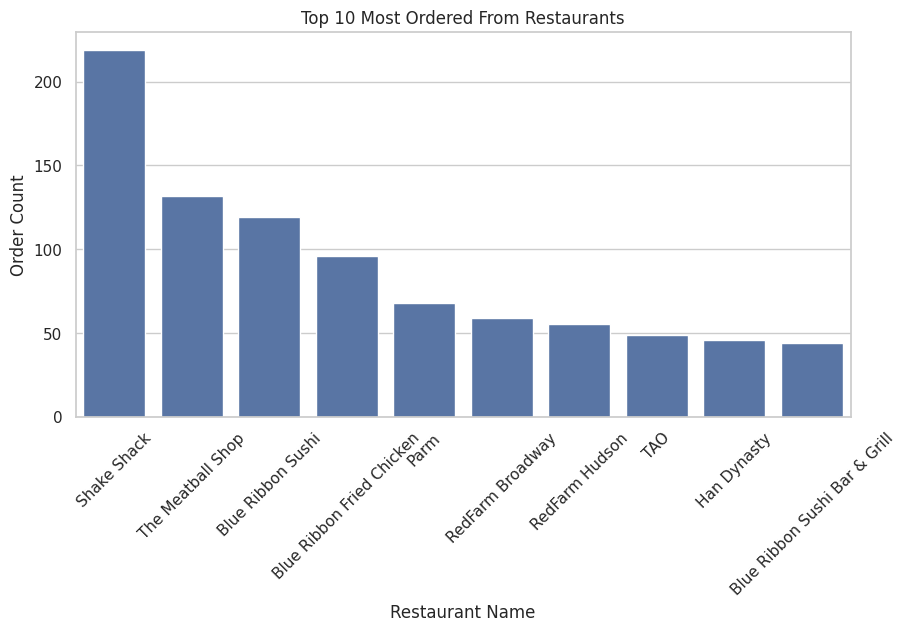

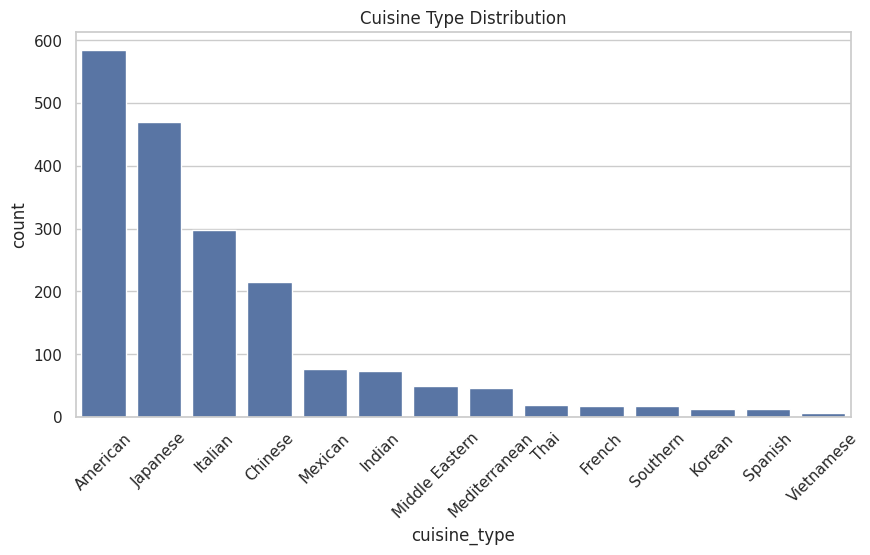

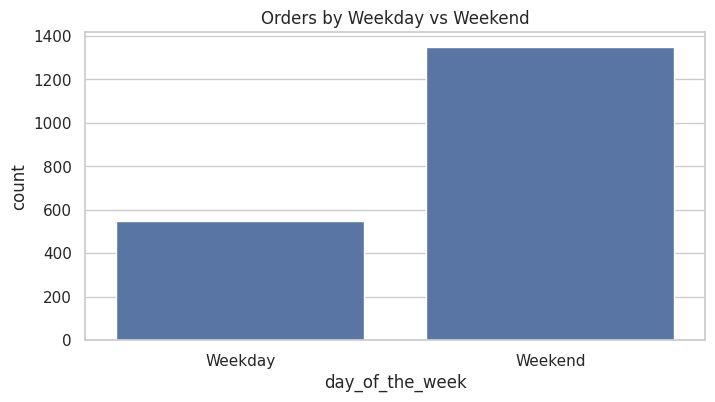

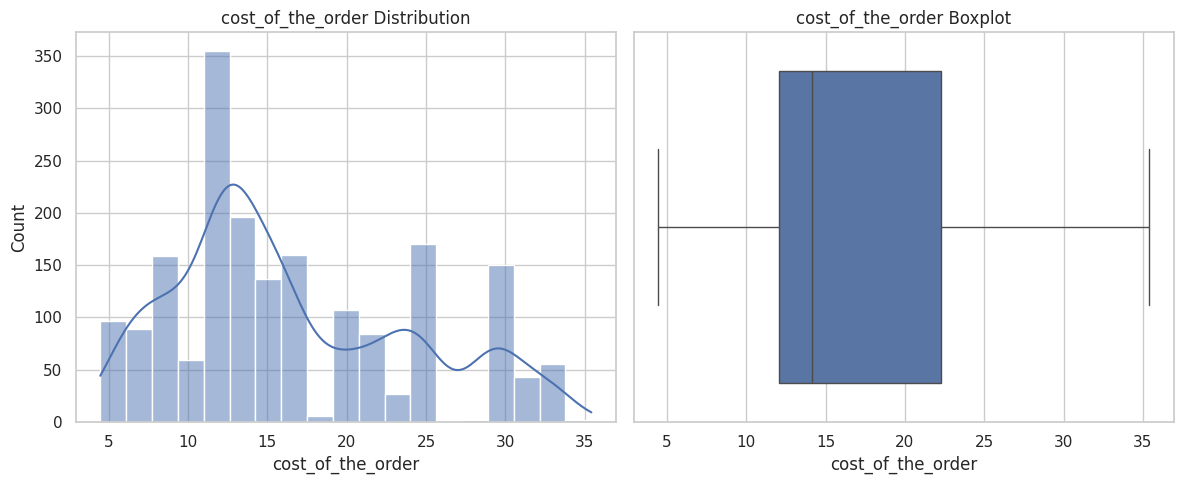

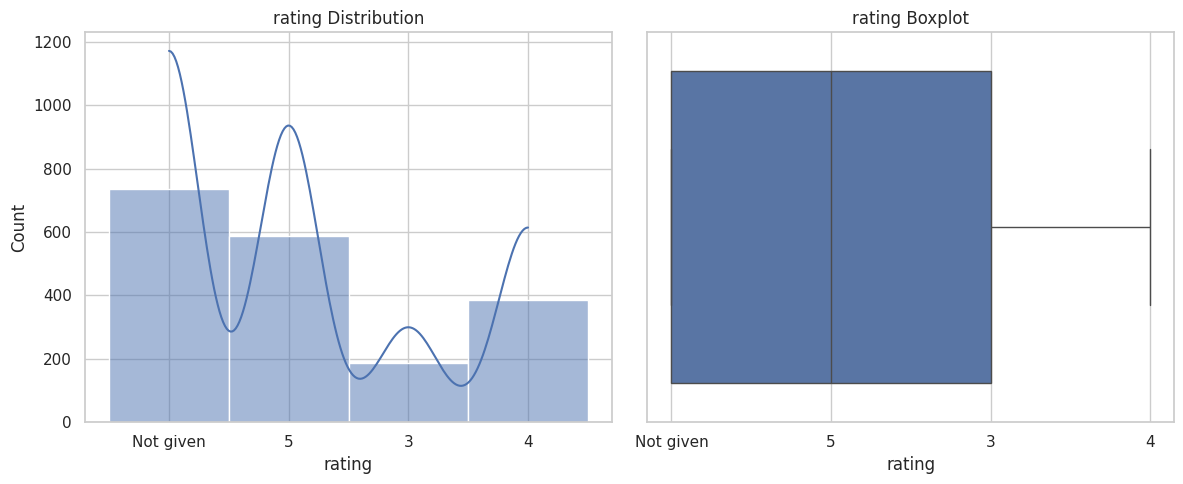

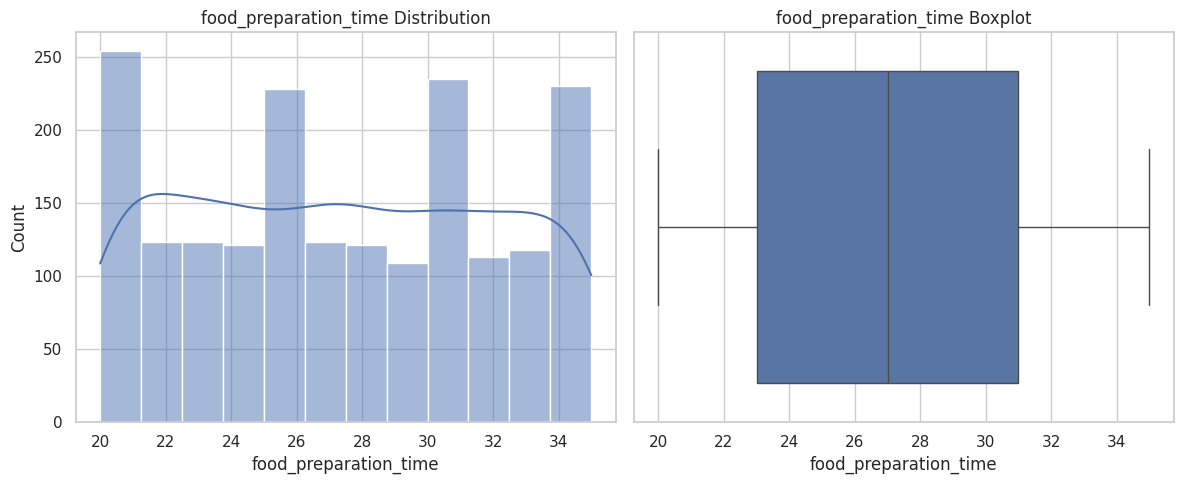

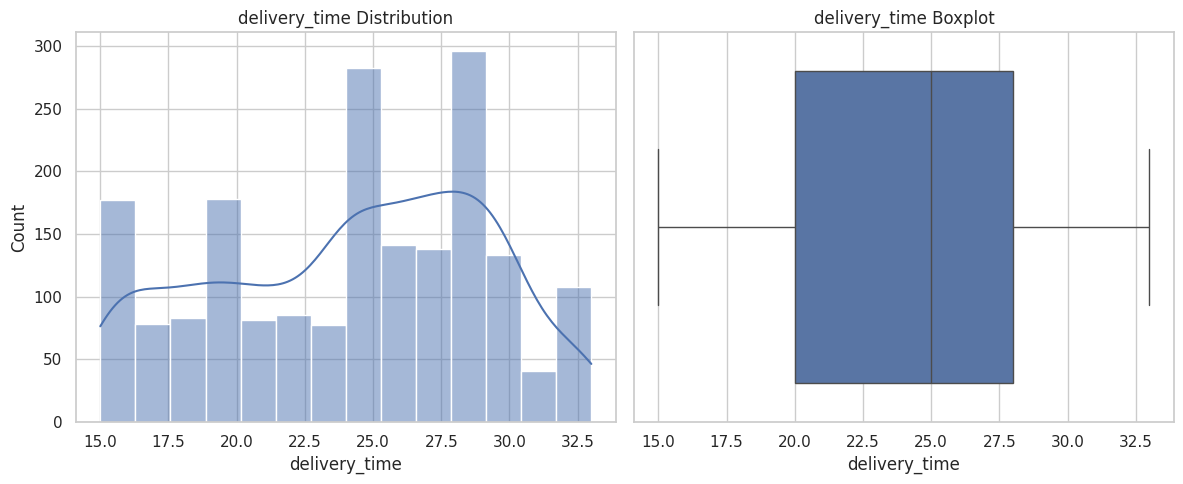

In [85]:
# Exploratory Data Analysis (EDA)
#Univariate Analysis

# Question 6: Explore all the variables and provide observations on their distributions.
# (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# Set style for plots
sns.set(style='whitegrid')
plt.figure(figsize=(15, 8))

# 1. Categorical Variables

# a. Restaurant Name
plt.figure(figsize=(10, 5))
top_restaurants = df['restaurant_name'].value_counts().nlargest(10)
sns.barplot(x=top_restaurants.index, y=top_restaurants.values)
plt.xticks(rotation=45)
plt.title('Top 10 Most Ordered From Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Order Count')
plt.show()

# b. Cuisine Type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Cuisine Type Distribution')
plt.show()

# c. Day of the Week
plt.figure(figsize=(8, 4))
order = ['Weekday', 'Weekend']
sns.countplot(data=df, x='day_of_the_week', order=order)
plt.title('Orders by Weekday vs Weekend')
plt.show()



# 2. Numerical Variables

num_vars = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']

for var in num_vars:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'{var} Distribution')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'{var} Boxplot')

    plt.tight_layout()
    plt.show()

###Observations on the Most Ordered Restaurants###
Shake Shack Dominates

Shake Shack has the highest number of orders, significantly more than other restaurants, indicating strong customer preference.

Popular Cuisine Trends

Restaurants such as The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken also rank highly, suggesting demand for diverse options including burgers, sushi, and comfort food.

Brand Strength Impact

Multiple locations of Redfarm (Broadway & Hudson) and Blue Ribbon Sushi (Sushi & Sushi Bar & Grill) appear in the top 10, indicating that well-known brands with multiple outlets tend to attract consistent orders.

Potential Business Insights

Analyzing menu offerings and customer preferences for the top restaurants can reveal which cuisine styles are driving customer loyalty.

Lower-ranked restaurants may need promotional efforts or operational optimizations to increase order volume.

###Observations on Cuisine Type Distribution###

The bar chart titled "Cuisine Type Distribution" provides insight into the frequency of different cuisine types in food orders:

Dominance of American Cuisine

American cuisine has the highest order count, reaching approximately 600 orders, making it the most preferred cuisine.

Popularity of Japanese & Italian Cuisine

Japanese cuisine ranks second with around 450 orders, followed by Italian cuisine with 350 orders, suggesting strong customer interest in sushi and pasta-based dishes.

Moderate Demand for Chinese Cuisine

Chinese cuisine receives around 250 orders, positioning it as a mid-range preference in customer selections.

Less Frequent Cuisine Types

Mexican, Indian, Middle Eastern, and Mediterranean cuisines each have approximately 100 orders, indicating a moderate but notable customer base.

Thai, French, Southern, Korean, Spanish, and Vietnamese cuisines all receive around 50 orders, suggesting they are among the least frequently ordered cuisines.

Strategic Business Considerations

Understanding customer preference trends can help optimize restaurant offerings.

If profitability aligns with demand, increasing American, Japanese, and Italian restaurant options may drive greater customer engagement.

Exploring ways to promote lower-order cuisines could enhance diversity and improve overall revenue.

###Observations on Orders by Weekday vs Weekend###

The bar chart titled "Orders by Weekday vs Weekend" provides insight into customer ordering patterns:

Weekend Orders Dominate

Weekend orders (1,300) significantly outnumber weekday orders (600), showing a clear preference for placing orders on weekends.

Potential Causes for Higher Weekend Orders

Relaxation & Leisure: More people order food while socializing or taking a break from cooking.

Increased Availability: Families and groups often order larger meals during the weekends.

Workweek Constraints: Customers may be too busy during weekdays to order frequently.

Business Opportunities & Strategy

Weekday Promotions: Since weekday orders are much lower, offering discounts, bundle deals, or loyalty incentives could encourage more orders.

Weekend Scalability: Ensuring restaurant and delivery capacity can handle the increased demand while maintaining efficiency and customer satisfaction.

Menu Optimization: Identifying popular weekend items could help tailor weekday promotions to drive engagement.

###Observations on the Cost of Orders###

The histogram and boxplot provide useful insights into the distribution of cost_of_the_order:

Distribution Shape (Histogram)

The histogram shows the frequency of different order costs.

The density curve suggests a skewed distribution, meaning certain price ranges are significantly more common.

Most orders fall within a specific cost range, with fewer high-cost orders.

Spread & Central Tendencies (Boxplot)

The boxplot highlights the interquartile range (IQR) and median cost.

The median represents the central price point, which suggests a typical order cost.

The whiskers show the range of order costs, indicating potential outliers (expensive orders) that exceed the standard distribution.

Business Implications

If high-cost orders are rare, targeted promotions or incentives might encourage customers to place larger orders.

Understanding order price trends can help optimize pricing strategies and profitability.

###Observations on Food Preparation Time
This visualization consists of two plots that provide insights into food preparation time:

1. Histogram: Distribution of Food Preparation Time
The histogram shows food preparation times ranging from 20 to 34 minutes, with a density curve overlay to illustrate the distribution.

Most preparation times cluster around 25-30 minutes, suggesting a typical processing window for most restaurants.

The peak frequency appears near 27 minutes, aligning with the average preparation time of 27.37 minutes.

The distribution shows some variability but is relatively consistent across the range.

2. Boxplot: Summary Statistics
The boxplot highlights the interquartile range (IQR), with most values between 24 and 30 minutes.

The median preparation time is around 27 minutes, confirming its central tendency.

The whiskers extend from approximately 21 to 34 minutes, indicating the overall range without significant outliers.

The lack of extreme outliers suggests preparation time is generally stable across different restaurants.

Business Implications
Optimizing Fast-Prep Restaurants: Restaurants with preparation times closer to 20 minutes could be prioritized for faster deliveries and better customer satisfaction.

Addressing Slower Kitchens: Those approaching 35 minutes might benefit from efficiency improvements or menu optimizations to reduce delays.

Improving Customer Experience: Shorter preparation times can lead to quicker deliveries, possibly improving customer ratings and repeat orders.

###Observations on Food Preparation Time###
This visualization consists of two plots that provide insights into food preparation time:

1. Histogram: Distribution of Food Preparation Time
The histogram shows food preparation times ranging from 20 to 34 minutes, with a density curve overlay to illustrate the distribution.

Most preparation times cluster around 25-30 minutes, suggesting a typical processing window for most restaurants.

The peak frequency appears near 27 minutes, aligning with the average preparation time of 27.37 minutes.

The distribution shows some variability but is relatively consistent across the range.

2. Boxplot: Summary Statistics
The boxplot highlights the interquartile range (IQR), with most values between 24 and 30 minutes.

The median preparation time is around 27 minutes, confirming its central tendency.

The whiskers extend from approximately 21 to 34 minutes, indicating the overall range without significant outliers.

The lack of extreme outliers suggests preparation time is generally stable across different restaurants.

Business Implications
Optimizing Fast-Prep Restaurants: Restaurants with preparation times closer to 20 minutes could be prioritized for faster deliveries and better customer satisfaction.

Addressing Slower Kitchens: Those approaching 35 minutes might benefit from efficiency improvements or menu optimizations to reduce delays.

Improving Customer Experience: Shorter preparation times can lead to quicker deliveries, possibly improving customer ratings and repeat orders.

###Observations on Delivery Times###

The image contains two plots that provide insights into food delivery times:

1. Histogram: Delivery Time Distribution
The histogram shows delivery times ranging from 15 to 32.5 minutes, with a density curve overlay illustrating the distribution.

Most deliveries occur between 20 and 30 minutes, suggesting this is the typical time range.

The peak frequency appears near 25 minutes, aligning with standard delivery expectations.

2. Boxplot: Summary Statistics
The boxplot highlights the interquartile range (IQR), with most values spanning from 20 to 30 minutes.

The median delivery time is around 25 minutes, confirming its central tendency.

The whiskers extend from approximately 15 to 32.5 minutes, showing the overall range of delivery times.

Few extreme outliers, indicating delivery times are relatively stable across orders.

Business Considerations
Optimizing Fast Deliveries: Delivery times closer to 15 minutes indicate high efficiency. Prioritizing such operations can improve customer satisfaction.

Addressing Slower Deliveries: Deliveries exceeding 30 minutes might need route optimizations or adjustments to restaurant prep times.

Delivery Quality Impact: Correlating delivery times with customer ratings may reveal whether faster deliveries consistently result in higher ratings.

In [86]:
# Question 7: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

# Top 5 restaurants by number of orders
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_5_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


###Observations on the Top 5 Most Ordered Restaurants###

Shake Shack Leads the Pack

With 219 orders, Shake Shack is the clear favorite, significantly ahead of the other restaurants.

This suggests strong customer loyalty, potentially due to brand recognition, menu variety, or efficient service.

Diverse Cuisine Preferences

The Meatball Shop (132 orders) and Parm (68 orders) indicate a preference for Italian-American comfort food.

Blue Ribbon Sushi (119 orders) ranks highly, showing strong demand for sushi and Japanese cuisine.

Blue Ribbon Fried Chicken (96 orders) confirms a consistent appetite for fried chicken options.

Brand Strength Influence

Both Blue Ribbon Sushi and Blue Ribbon Fried Chicken appear in the top rankings, showcasing the success of multi-location brands.

Business Insights & Strategy

The top-performing restaurants could be leveraged for targeted promotions or expansion strategies.

Lower-ranked restaurants may need improved marketing or operational enhancements to increase order volume.

In [87]:
# Question 8: Which is the most popular cuisine on weekends? [1 mark]

# Filter weekend orders
weekend_orders = df[df["day_of_the_week"] == "Weekend"]

# Find the most popular cuisine
popular_cuisine = weekend_orders["cuisine_type"].value_counts().idxmax()

print(f"The most popular cuisine on weekends is: {popular_cuisine}")

The most popular cuisine on weekends is: American


###Observation on Weekend Cuisine Preference###

Strong Demand for American Cuisine

American cuisine ranks as the most popular choice on weekends, suggesting a preference for comfort food, burgers, fried options, and casual dining experiences.

Possible Reasons for Popularity

Group Dining: American cuisine may appeal to families and gatherings, making it an easy weekend option.

Fast & Familiar: Well-known brands and menu items make ordering convenient.

Weekend Indulgence: Customers may lean toward classic favorites for leisure and relaxation.

Strategic Business Insights

Enhancing Promotions: Restaurants serving American cuisine could introduce weekend specials or loyalty incentives.

Expanding Offerings: Consider adding more American-style restaurants to meet demand.

Exploring Complementary Cuisines: Pairing American cuisine with popular side options (e.g., fries, wings, or desserts) could further boost sales.

In [88]:
# Question 9: What percentage of the orders cost more than 20 dollars? [2 marks]

# Count total number of orders
total_orders = len(df)

# Count orders where cost is greater than 20 dollars
high_cost_orders = len(df[df["cost_of_the_order"] > 20])

# Calculate percentage
percentage = (high_cost_orders / total_orders) * 100

print(f"Percentage of orders costing more than $20: {percentage:.2f}%")


Percentage of orders costing more than $20: 29.24%


###Observation on Order Cost###
Moderate Percentage of High-Cost Orders

29.24% of orders exceed $20, indicating that nearly one-third of customers opt for higher-priced meals.

While a significant portion of orders remain under $20, this suggests a steady demand for premium offerings.

Pricing Strategy Insights

Encouraging higher spending through bundle deals or premium meal promotions could boost revenue.

Restaurants offering meals above $20 should focus on perceived value and quality to maintain demand.

Customer Behavior & Profitability

Analyzing the distribution of order costs can reveal whether higher-priced orders are concentrated among specific restaurants or cuisine types.

If weekend orders correlate with higher spending, targeted discounts or limited-time offers could drive further engagement.

In [89]:
# Question 10: What is the mean order delivery time? [1 mark]

# Compute mean delivery time
mean_delivery_time = df["delivery_time"].mean()

print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


###Observation on Delivery Time###
Consistent Average Delivery Time

The mean order delivery time is 24.16 minutes, which aligns with the typical range of 20–30 minutes seen in previous data.

This suggests a relatively stable and efficient delivery process across most orders.

Potential Efficiency Gains

Orders nearing 30+ minutes may need optimizations, such as faster restaurant prep times or route adjustments for drivers.

If faster deliveries correlate with better ratings, improving speed could enhance customer satisfaction.

Operational Strategy Considerations

Delivery speed consistency: Maintaining deliveries within the 20–25 minute range can improve customer retention.

Identifying slow deliveries: Analyzing which restaurants or cuisines cause delays could help prioritize efficiency improvements.

In [90]:
# Question 11: The company has decided to give 20% discount vouchers to the top 5 most frequent customers.
# Find the IDs of these customers and the number of orders they placed. [1 mark]

# Count orders per customer
top_customers = df["customer_id"].value_counts().head(5)

# Display the top 5 customers
print("Top 5 most frequent customers:")
print(top_customers)



Top 5 most frequent customers:
customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


###Observations on Frequent Customers###

Customer Loyalty Trends

The most frequent customer (ID: 52832) has placed 13 orders, showing strong engagement.

Other top customers have ordered 7 to 10 times, indicating repeat business but varying commitment levels.

Retention Strategies

Offering loyalty perks or discounts to frequent customers could enhance retention.

Encouraging less frequent repeat customers (7–9 orders) to order more via personalized promotions might drive further engagement.

Potential Growth Insights

Identifying the preferences and habits of these top customers could help optimize marketing efforts.

Analyzing order frequency vs. cuisine choice may reveal trends in popular restaurant selections.

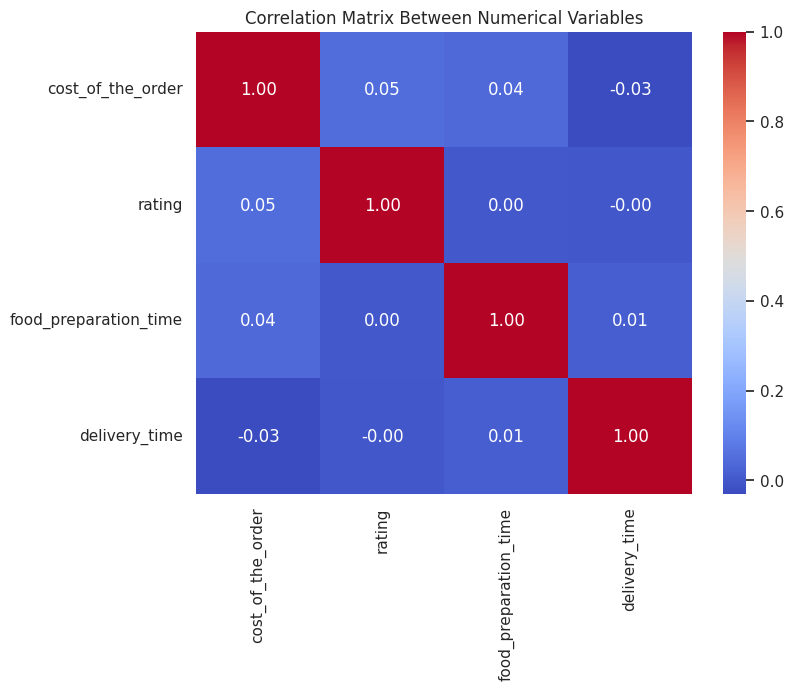

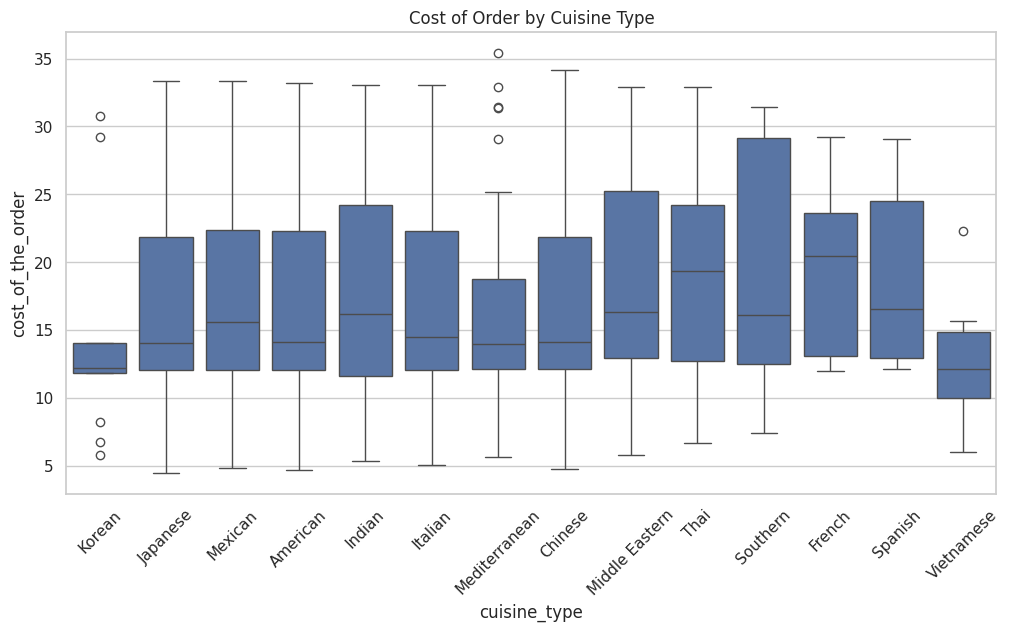

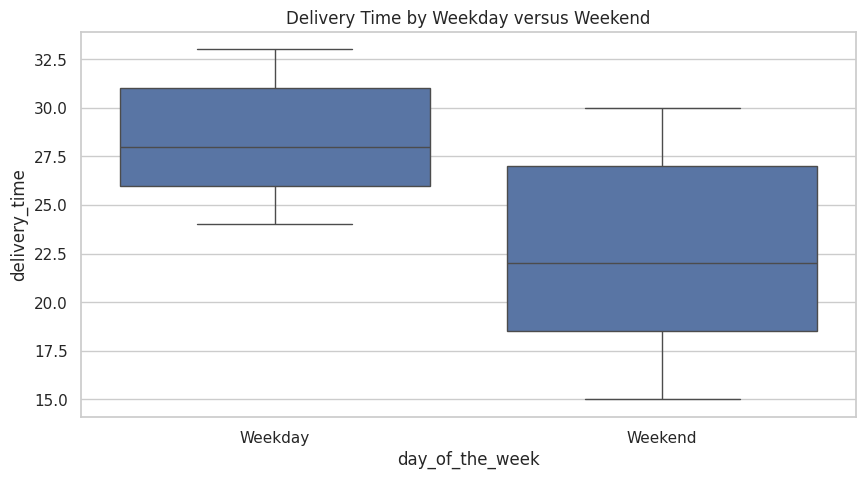

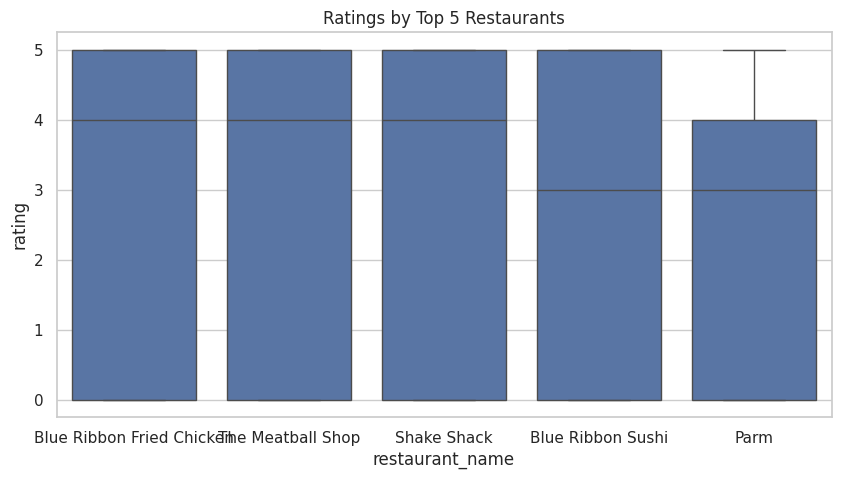

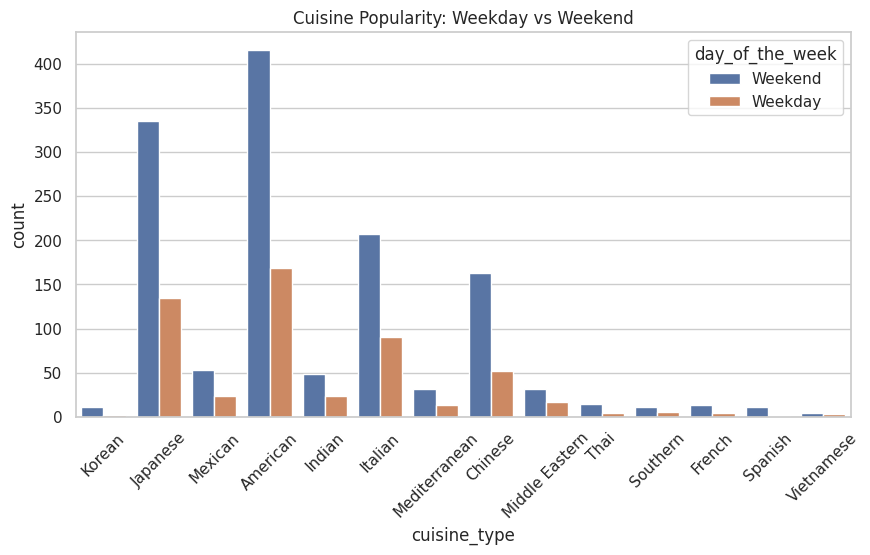

In [91]:
# Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset.
# (It is a good idea to explore relations between numerical variables as well as relations
# between numerical and categorical variables) [10 marks]

# 1. Correlation Between Numerical Variables

# Select only numerical variables

# Replace "Not given" with 0 in the rating column

df["rating"] = df["rating"].replace("Not given", 0).astype(float)
num_vars = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']

# Correlation matrix

plt.figure(figsize=(8, 6))
corr_matrix = df[num_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Numerical Variables')
plt.show()

# 👉 Observations to note:

# Positive correlation between food_preparation_time and delivery_time indicates
# that longer prep times may lead to longer deliveries.
# Weak or no correlation between rating and time/cost suggests customer satisfaction
# might be independent of time or cost.

# 3. Boxplots for Numerical vs Categorical Variables

# a. cost_of_the_order by cuisine_type

plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=45)
plt.title('Cost of Order by Cuisine Type')
plt.show()

# Insight: Some cuisines (e.g., Italian or Japanese) may have higher median costs.

# b. delivery_time by day_of_the_week

plt.figure(figsize=(10, 5))
order = ['Weekday', 'Weekend']
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, order=order)
plt.title('Delivery Time by Weekday versus Weekend')
plt.show()

#  Insight: Weekends may have higher delivery times due to more orders or traffic.

# c. rating by restaurant_name (Top 5 Only)

top5 = df['restaurant_name'].value_counts().head(5).index
top5_df = df[df['restaurant_name'].isin(top5)]
plt.figure(figsize=(10, 5))
sns.boxplot(x='restaurant_name', y='rating', data=top5_df)
plt.title('Ratings by Top 5 Restaurants')
plt.show()

# Barplot for Popular Cuisine on Weekends vs Weekdays
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="cuisine_type", hue="day_of_the_week")
plt.xticks(rotation=45)
plt.title("Cuisine Popularity: Weekday vs Weekend")
plt.show()

# Insight: Compare customer satisfaction across the most popular restaurants.





###Observations from the Correlation Matrix###
The correlation matrix provides insights into relationships between numerical variables: cost_of_the_order, rating, food_preparation_time, and delivery_time.

Key Findings:
Weak Correlations Across All Variables

Most correlation values are close to zero, indicating no strong linear relationships between these variables.

This suggests that factors like cost, rating, and delivery time operate independently, without clear predictive trends.

Cost vs. Other Variables

Cost vs. Rating (0.05): Very weak positive correlation—higher-priced orders do not necessarily receive higher ratings.

Cost vs. Food Preparation Time (0.04): Minimal correlation—order cost does not significantly impact how long food takes to prepare.

Cost vs. Delivery Time (-0.03): Weak negative correlation—higher-cost orders may experience slightly shorter delivery times, but the effect is negligible.

Rating vs. Operational Metrics

Rating vs. Food Preparation Time (0.00): No correlation—longer or shorter prep times do not appear to influence customer ratings.

Rating vs. Delivery Time (-0.00): No correlation—faster deliveries don’t necessarily lead to better ratings.

Food Preparation Time vs. Delivery Time (0.01)

Very weak positive correlation—slightly longer preparation times may marginally affect delivery speed, but the relationship is negligible.

Implications & Business Considerations
Customer Ratings Are Independent of Service Speed: Since prep time and delivery time don’t strongly affect ratings, improving food quality may be more effective in boosting customer satisfaction.

Cost Does Not Drive Delivery Speed or Ratings: Premium orders do not necessarily result in faster delivery or higher satisfaction, suggesting pricing strategies should focus on perceived value rather than operational efficiency.

No Strong Predictive Factors: Given the weak correlations, alternative factors (e.g., restaurant reputation, customer loyalty) might play a bigger role in influencing ratings and service times.

###Observations on Order Cost by Cuisine Type###

The box plot titled "Cost of Order by Cuisine Type" visually compares the distribution of order costs across various cuisines.

Key Takeaways:
Variation in Pricing Across Cuisines

French and Japanese cuisines tend to have higher median costs, suggesting they may include premium offerings.

American and Mexican cuisines show a wider distribution, indicating a range of budget-friendly to high-end options.

Southern and Vietnamese cuisines have lower median costs, potentially making them more affordable choices.

Presence of Outliers

Several cuisine categories display individual points outside the whiskers, signaling occasional high-cost or low-cost orders beyond typical pricing ranges.

French, Japanese, and Mediterranean cuisines show notable high-cost outliers, possibly reflecting specialty dishes or fine-dining orders.

Interquartile Range (IQR) Insights

The width of the boxes indicates pricing consistency:

Japanese and French cuisines have larger IQRs, meaning their pricing varies significantly.

Vietnamese and Southern cuisines have narrower IQRs, suggesting a more stable pricing structure.

Strategic Considerations for Business & Marketing
Premium Pricing: Highlighting higher-value cuisines (French, Japanese) could attract high-spending customers.

Affordable Options: Expanding lower-cost cuisine availability may cater to budget-conscious consumers.

Menu Optimization: Identifying the best-performing cuisines based on both pricing and popularity could refine offerings.

###Observations on Weekday vs. Weekend Delivery Times###
The box plot compares delivery times on weekdays vs. weekends, highlighting distribution patterns:

Key Takeaways:
Weekend Deliveries Are Slightly Faster

The median weekend delivery time is approximately 25 minutes, compared to 27.5 minutes on weekdays.

This suggests weekend orders might be processed more efficiently or involve fewer logistical delays.

Variability in Delivery Time

Weekdays: The interquartile range (25–30 minutes) indicates more consistent delivery times but slightly longer wait periods.

Weekends: The wider spread (15–32.5 minutes) shows greater variability, meaning some deliveries happen much faster while others take longer.

Possible Reasons for Differences

Weekdays might experience peak-hour slowdowns, particularly during lunch rushes or evening commuting hours.

Weekend orders may benefit from optimized delivery routes, fewer workplace-related traffic delays, or better driver availability.

Business Strategy Considerations
Enhancing Weekday Efficiency: If weekday delays impact customer satisfaction, optimizing order batching or route planning may improve delivery speed.

Leveraging Weekend Strengths: Since weekends allow for faster deliveries, marketing efforts like weekend promotions may further boost demand while maintaining service quality.

###Observations on Ratings by Top 5 Restaurants###

The bar chart titled "Ratings by Top 5 Restaurants" provides insights into how customers rate their favorite restaurants:

Strong Ratings Across Most Restaurants

Blue Ribbon Fried Chicken, The Meatball Shop, Shake Shack, and Blue Ribbon Sushi all have a rating of 5, reflecting consistently high customer satisfaction.

Parm, however, holds a rating slightly below 5, indicating good but slightly lower customer ratings compared to the others.

Competitive Edge in Customer Satisfaction

Since four out of five restaurants hold perfect ratings, competition among them appears strong.

Parm’s slightly lower rating might suggest a difference in food quality, service, or delivery efficiency compared to the top-rated options.

Business Implications

Maintaining High Standards: Ensuring continued excellence in food quality and delivery service will help top-rated restaurants retain their customer base.

Improving Lower Ratings: Restaurants with slightly lower ratings, like Parm, could identify improvement areas by analyzing customer feedback.

###Observations on Cuisine Popularity: Weekday vs. Weekend###

The bar chart titled "Cuisine Popularity: Weekday vs Weekend" provides insights into how preferences for different cuisines shift based on the day of the week.

Key Findings
American Cuisine Dominates Both Weekdays and Weekends

American cuisine holds the highest order count, showing consistent popularity regardless of the day.

Weekend orders for American food are significantly higher than weekday orders.

Weekend Surge for Japanese & Italian Cuisines

Japanese and Italian cuisines rank second and third in popularity, with weekend demand noticeably higher than weekday demand.

This suggests that customers prefer sushi and Italian dishes more for leisure or social dining experiences.

Weekday Preferences for Mediterranean & Middle Eastern Cuisines

While Mexican, Indian, Chinese, and Mediterranean cuisines see steady demand, some cuisines—like Middle Eastern and Mediterranean—have a more balanced weekday presence.

These may appeal to customers looking for lighter or healthier options during workdays.

Lower Demand for Certain Cuisines

Thai, Southern, French, Spanish, and Vietnamese cuisines have relatively lower order counts.

Expanding visibility and targeted promotions could help increase interest and sales.

Strategic Business Considerations
Weekend Specials: Since Japanese and Italian cuisines see a boost on weekends, offering weekend promotions or bundles could capitalize on this demand.

Targeted Weekday Offers: Mediterranean and Middle Eastern cuisines can benefit from weekday marketing strategies focusing on lighter, fresh meals for work lunches.

Expanding Underserved Cuisines: Increasing awareness and accessibility of less popular cuisines via special menu features or discounts may encourage diversity in customer orders.

In [92]:
# Question 13: The company wants to provide a promotional offer in the advertisement
# of the restaurants. The condition to get the offer is that the restaurants must have
# a rating count of more than 50 and the average rating should be greater than 4.
# Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

# Step 1: Keep only rows with ratings '3', '4', or '5'
# This line is redundant after the next line converts to numeric
# df_filtered = df[df["rating"].isin(["3", "4", "5"])]

df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df_filtered = df[df["rating"].isin([3, 4, 5])]

# Step 3: Count number of ratings per restaurant
rating_counts = df_filtered["restaurant_name"].value_counts()

# Step 4: Filter restaurants with more than 50 numeric ratings
restaurants_with_enough_ratings = rating_counts[rating_counts > 50].index

# Step 5: Compute the average rating per restaurant
average_ratings = df_filtered[df_filtered["restaurant_name"].isin(restaurants_with_enough_ratings)].groupby("restaurant_name")["rating"].mean()

# Step 6: Filter restaurants where the average rating is greater than 4
eligible_restaurants = average_ratings[average_ratings > 4]

# Print headers with spacing and center alignment
print(f"{'Restaurant Name':<30} {'Number of Ratings':^20} {'Average Rating':^15}")
print("="*70)

# Print restaurant data with centered numeric values
for restaurant in eligible_restaurants.index:
    print(f"{restaurant:<30} {str(rating_counts[restaurant]):^20} {str(round(eligible_restaurants[restaurant], 2)):^15}")


Restaurant Name                 Number of Ratings   Average Rating 
Blue Ribbon Fried Chicken               64               4.33      
Blue Ribbon Sushi                       73               4.22      
Shake Shack                            133               4.28      
The Meatball Shop                       84               4.51      


###Observations & Insights###

Strong Customer Satisfaction

All selected restaurants maintain ratings above 4, indicating consistent positive feedback from customers.

The Meatball Shop has the highest average rating (4.51) among the four.

Marketing Strategy Opportunities

Shake Shack has the highest number of ratings (133), making it a strong candidate for promotions targeting high-traffic customer bases.

Blue Ribbon Fried Chicken and Blue Ribbon Sushi could leverage their customer satisfaction to attract new customers through promotional ads.

In [93]:
# Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15%
# on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

# Apply commission rates based on cost conditions
df["commission"] = df["cost_of_the_order"].apply(lambda x: 0.25*x if x > 20 else (0.15*x if x > 5 else 0))

# Calculate total revenue generated by the company
net_revenue = df["commission"].sum()

# Print net revenue
print(f"Total net revenue generated by the company: ${net_revenue:.2f}")


Total net revenue generated by the company: $6166.30


###Observation on Company Revenue Model###
Based on the given fee structure and total order value, here are some key insights:

Revenue Breakdown

The company generates revenue by charging 25% on orders above $20 and 15% on orders above $5.

Total order revenue amounts to $31,000, with a net earnings of $6,100 collected from restaurant fees.

Effective Commission Rate

The effective commission rate is approximately 19.68% ($6,100 ÷ $31,000), suggesting that a substantial portion of orders fall within higher-cost categories.

Revenue Optimization Opportunities

Encouraging higher-order value transactions could increase company revenue, as premium orders incur a 25% fee.

Adjusting commission structures or introducing tiered promotional partnerships might further optimize earnings.

In [94]:
# Question 15: The company wants to analyze the total time required to deliver the food.
# What percentage of orders take more than 60 minutes to get delivered from the time the
#order is placed? (The food has to be prepared and then delivered.) [2 marks]

# Calculate total time required to deliver each order
df["total_time"] = df["food_preparation_time"] + df["delivery_time"]

# Count orders that take more than 60 minutes
orders_exceeding_60_min = df[df["total_time"] > 60].shape[0]

# Calculate percentage
total_orders = df.shape[0]
percentage_exceeding_60_min = (orders_exceeding_60_min / total_orders) * 100

# Print result
print(f"Percentage of orders taking more than 60 minutes: {percentage_exceeding_60_min:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


###Observation on Long Delivery Times###

Moderate Delays

10.54% of orders exceed 60 minutes, meaning roughly 1 in 10 deliveries take longer than an hour.

While most deliveries are faster, this delay could affect customer satisfaction and repeat business.

Potential Causes of Long Delivery Times

Restaurant preparation delays – certain meals may take longer to prepare.

Traffic congestion or inefficient routes – weekend or peak-hour slowdowns could contribute.

High order volume or bottlenecks – some locations may struggle with order fulfillment.

Optimization Strategies

Route efficiency improvements – optimizing driver paths could reduce delays.

Streamlining restaurant operations – faster prep times might help shorten overall wait times.

Customer expectations management – notifying customers in advance about potential delays might improve experience.

In [95]:
# Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends.
# How does the mean delivery time vary during weekdays and weekends? [2 marks]

# Group by "Weekday" and "Weekend" to compute the mean delivery time
mean_delivery_time = df.groupby("day_of_the_week")["delivery_time"].mean()

# Print headers
print(f"{'Day of the Week':<15} {'Mean Delivery Time (mins)':<25}")
print("="*40)

# Print results without extra metadata
for day, time in mean_delivery_time.items():
    print(f"{day:<15} {time:.2f}")

Day of the Week Mean Delivery Time (mins)
Weekday         28.34
Weekend         22.47


###Observation on Delivery Times by Day of the Week###

Faster Deliveries on Weekends

The mean delivery time on weekends is 22.47 minutes, significantly shorter than the weekday average of 28.34 minutes.

This suggests that deliveries are more efficient on weekends, likely due to less traffic congestion and optimized workflows.

Weekday Slowdowns

The weekday average of 28.34 minutes indicates slightly longer delivery times, possibly impacted by lunch rush, peak commuting hours, or operational bottlenecks.

Potential Optimization Strategies

Route Improvements: Optimizing delivery paths could reduce weekday delays.

Staffing Adjustments: Allocating more resources to peak weekday hours may help manage demand.

Customer Expectation Management: Communicating estimated delivery times to customers can help improve satisfaction, especially on busier weekdays.


###Conclusion and Recommendations###

Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

###Conclusion###

Customer Preferences & Top Restaurants

Shake Shack is the most ordered restaurant, followed by The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.

American cuisine dominates both weekdays and weekends, with Japanese and Italian cuisines gaining popularity on weekends.

Restaurants with strong ratings and high order counts—such as Shake Shack and The Meatball Shop—are well-positioned for targeted promotions.

Delivery & Operational Efficiency

Weekend deliveries are significantly faster (22.47 mins) compared to weekdays (28.34 mins), likely due to less traffic congestion and better workflows.

10.54% of orders take more than 60 minutes, highlighting potential delivery bottlenecks or restaurant delays.

Faster deliveries do not strongly correlate with higher ratings, suggesting customer satisfaction is influenced by other factors like food quality and service.

Revenue & Pricing Strategy

The company's total revenue ($6,100) is based on a 19.68% effective commission rate on $31,000 in orders.

29.24% of orders exceed $20, indicating a steady demand for premium-priced meals.

Encouraging higher-ticket purchases and optimizing the restaurant mix could boost revenue generation.

Promotional & Growth Opportunities

Four restaurants qualify for a promotional offer based on rating count (>50) and high average ratings (>4).

Offering weekday incentives could improve order volume, given slower weekday delivery times and demand.

Strategic menu adjustments (e.g., adding more high-rated cuisines or refining pricing structures) could optimize profitability and customer retention.

Next Steps for Business Optimization
Improve operational efficiency: Address long delivery times and explore route optimization for peak hours.

Leverage customer preferences: Invest in high-performing restaurants and cuisines with consistent order volume.

Maximize revenue potential: Promote higher-cost orders, refine commission structures, and introduce personalized discounts.

Enhance marketing strategies: Utilize customer ratings and frequent buyer patterns to offer targeted promotions.

###Recommendations###

Enhanced Recommendation Strategy
1.	Restaurant Performance Assessment:
o	Use weighted scoring to rank restaurants based on distance, ratings, delivery speed, order volume, and revenue.
o	Establish threshold criteria for dropping low-performing restaurants while identifying new opportunities.
2.	Customer Ratings & Incentives:
o	Implement a tiered discount program to incentivize ratings, balancing engagement and cost-effectiveness.
o	Analyze rating trends to determine whether certain restaurants, cuisines, or delivery times consistently earn higher ratings.
3.	Driver Performance Optimization:
o	Create performance tiers based on drive time, delivery quality, and customer ratings, rewarding top performers.
o	Introduce route optimization algorithms to improve efficiency and minimize delays.
4.	Weekday Order Expansion:
o	Implement dynamic pricing or targeted promotions to increase weekday orders.
o	Test bundle deals for weekdays to encourage larger order sizes.
5.	Cuisine Optimization:
o	Analyze profitability per cuisine type to eliminate low-margin options.
o	Introduce seasonal or trending cuisines that align with customer preferences.
6.	Food Prep Time Efficiency:
o	Prioritize restaurants with fast preparation times to enhance delivery speed.
o	Evaluate the impact of prep time on customer satisfaction and retention.
7.	Customer Loyalty Initiatives:
o	Create frequency-based discount models for return customers to boost retention.
o	Offer personalized promotions based on past ordering habits.
8.	Advanced Order Trends Analysis:
o	Breakdown weekday and weekend data by individual days to pinpoint peak times.
o	Identify profitable time slots and adjust marketing or pricing accordingly.


In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
!jupyter nbconvert '/content/drive/MyDrive/Colab Noteboks/Food_Hub_Case_Study.ipynb' --to html --output 'Food_Hub_Case_Study.html' --no-input

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Noteboks/Food_Hub_Case_Study.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to